In [27]:
import numpy as np #we have array based operation
import matplotlib.image as mpimg #we are going to do some image processing
import matplotlib.pyplot as plt # because we have to show images
import os as os #gives portable way of using operating system, here we use the image folder so we use this
import cv2 #use for all shorts of image and vdo analysis, here we analysis image so we use this

In [28]:
#Function to initialise the mean and variance images
def initBackground(initImage):
    img_arr = mpimg.imread(initImage)
    mean = img_arr #initial mean of first image
    variance = 9*np.ones(img_arr.shape) #initial variance of first image
    return(mean,variance)


In [29]:
#classify images into fogroud and backgound pixels using inequality based classifier
def ForegroundDetection(img_file,mean,variance,lmda):
    img = cv2.imread(img_file)
    d = img - mean #img is current image ,mean is referance image 
    y = variance*(lmda**2)#here lmda is user generate value
    d_2 = np.square(d)
    I = d_2 - y #difference between d squire and varience into lmda squire
    mask = np.all(I>0,axis=2) #mask give us matrix consisting of 1s and 0s ssince we have colour image so we take axis=2(0,1,2)
    rI = 255*mask.astype(int) #mask is an array where the values are either 0 and 1
    rI = rI.astype(np.uint8) # here we  typecasting it unit8 means unsign 8 bit integer
    return(rI)

In [30]:
#reduce the image noise using a voting scheme(filtering)
def Voting(rI,eta,m,n):
    r,c = rI.shape 
    cI = np.zeros((rI.shape[0],rI.shape[1])) #final image we return
    for i in range(m,r-1-m):
        for j in range(n,c-1-n):
            img_patch=rI[i-m:i,j-n:j] #patching the image file
            y_unq, counts = np.unique(img_patch,return_counts=True)#counting white and black pixel
            if len(counts) == 1 and y_unq[0] == 1: #counts give us the no of 0 occurs or 1 occurs
                cI[i,j]= 255               #couts usually contains two values 1 and 0 if lenght is 1 means neighbour hood is all black or all white
            if len(counts)>1:
                if counts[1] > eta*m*n: 
                    cI[i,j] = 255
    cI = cI.astype(np.uint8)# now here we  typecasting it unit8 means unsign 8 bit integer
    return cI      

In [31]:
#Update the mean and variance images using a weighted average scheme
def meanvarUpdate(cI,img_path,M,V,alpha):
    img = mpimg.imread(img_path) #new image
    mean_upd = np.zeros(img.shape) #new mean
    var_upd = np.zeros(img.shape) #new variable
    d = img - M #difference 
    d_2 = np.square(d)
    for i in range (cI.shape[0]):
        for j in range(cI.shape[1]):
            if cI[i,j] == 0: #putting the backgroud miodet update equation
                mean_upd[i,j,:]= (1-alpha)*M[i,j,:] + alpha*img[i,j,:]
                var_upd[i,j,:]= (1-alpha)*(V[i,j,:] + alpha*d_2[i,j,:])
                var_upd[i,j,:]= np.clip(var_upd[i,j,:],a_min = 9,a_max = None)# here we perfoming  cliping opeation
    return(mean_upd,var_upd)

In [34]:
def Background_Subtraction(img_dir,lmda,eta,m,n,alpha): #computing backgroundsubtraction
    
    img_file_name = os.listdir(img_dir)#image frames
    initImage = os.path.join(img_dir,img_file_name[0])# take all image as frame
    mean, variance = initBackground(initImage)
    
    for i in range(1,20): #we take 1 to 20 images 
        img_path = os.path.join(img_dir,img_file_name[i])
        
        fig, ax = plt.subplots(1,3,figsize=(10,10)) # here we getting forground image
        rI = ForegroundDetection(img_path,mean,variance,lmda)
        ax[0].imshow(rI,cmap="gray")
        
        cI = Voting(rI,eta,m,n) #voating to get better version of image
        mean, variance = meanvarUpdate(cI,img_path,mean,variance,alpha)
        ax[1].imshow(cI,cmap="gray")
        
        img = cv2.imread(img_path) # here we get coloured image
        ax[2].imshow(img,cmap="gray")
        
        plt.show() # showing the images
    return(mean,variance)

Using lambda as 0.7 and eta as 0.7


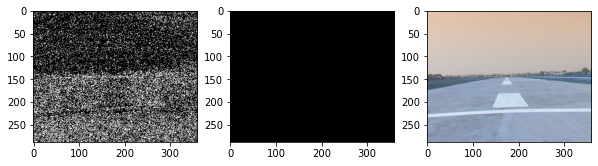

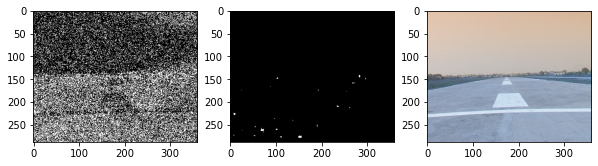

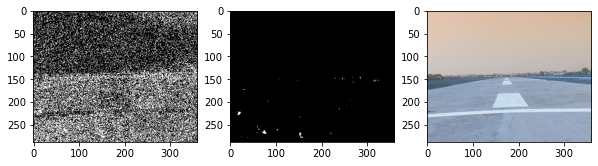

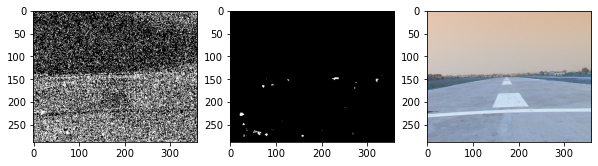

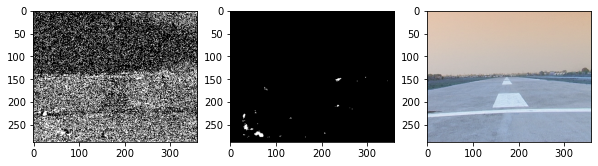

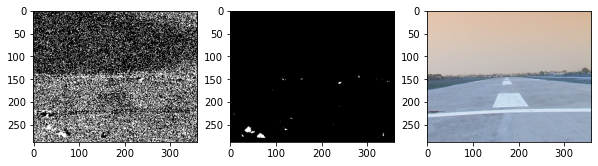

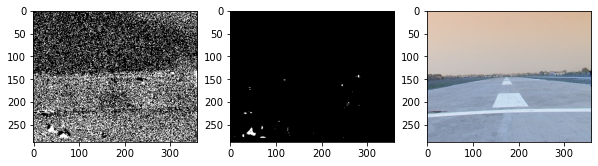

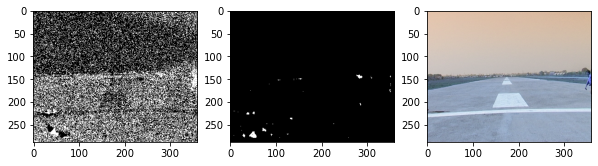

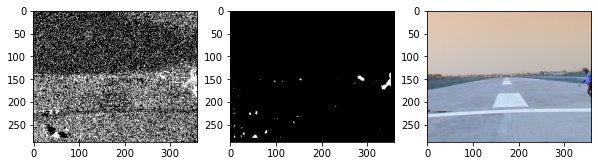

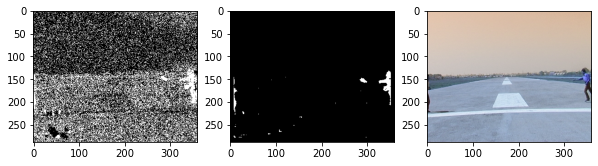

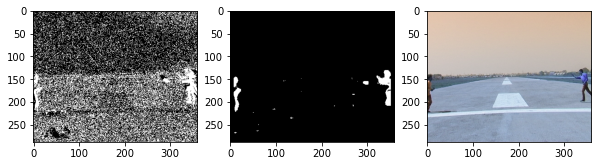

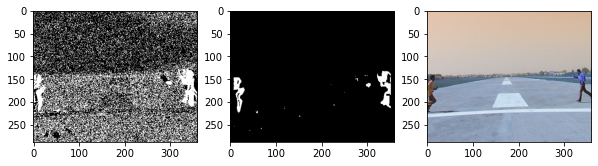

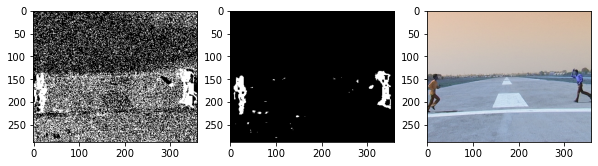

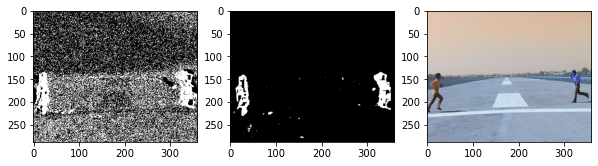

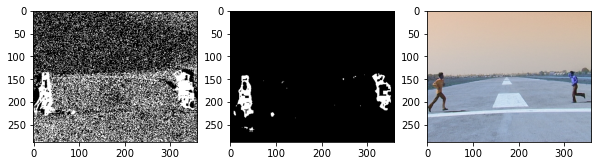

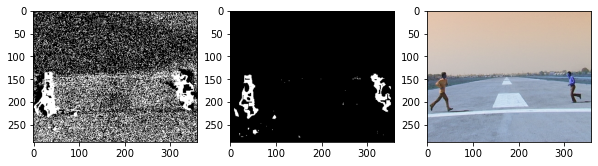

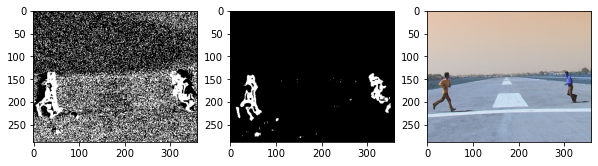

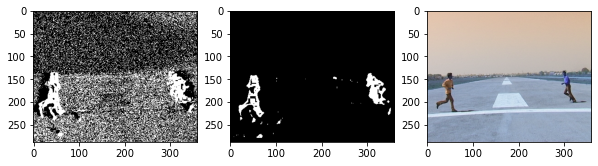

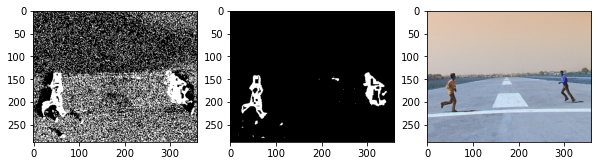



Using lambda as 0.72 and eta as 0.7


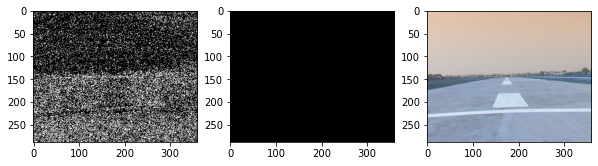

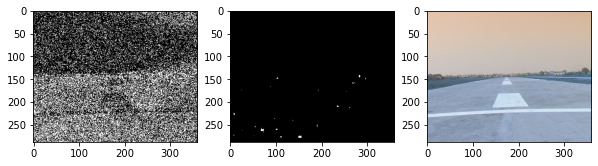

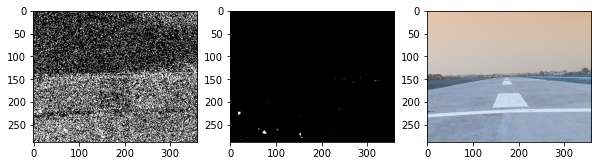

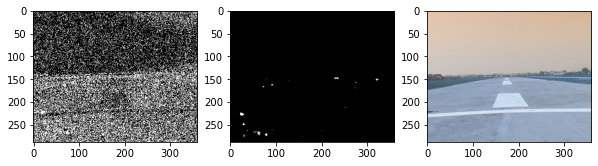

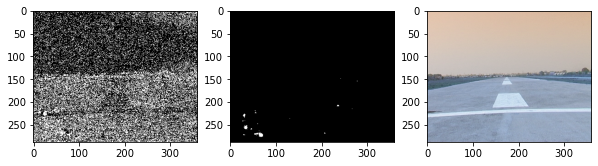

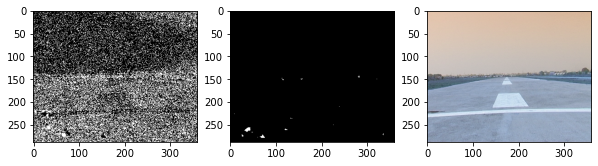

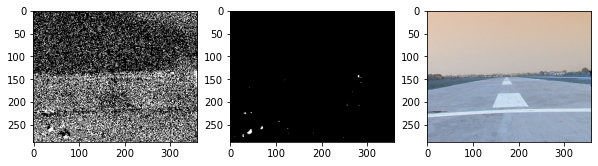

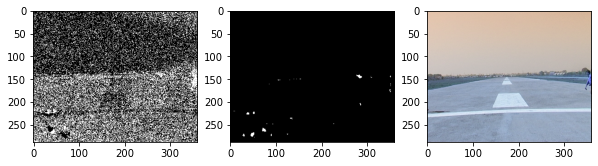

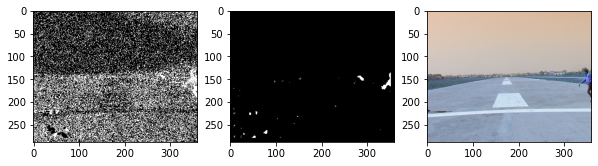

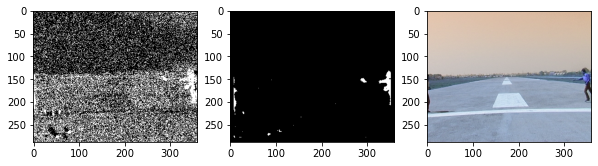

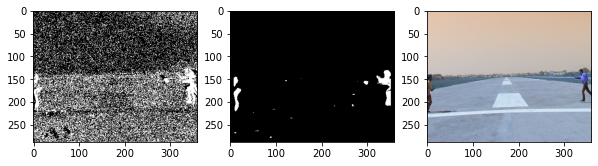

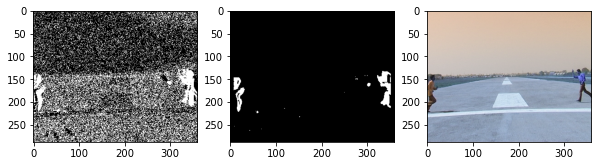

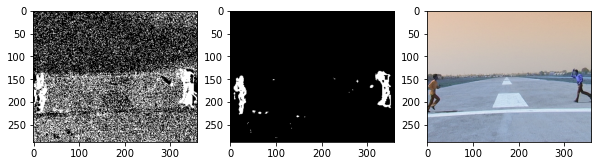

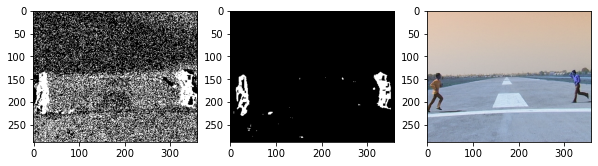

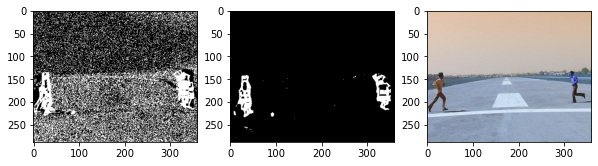

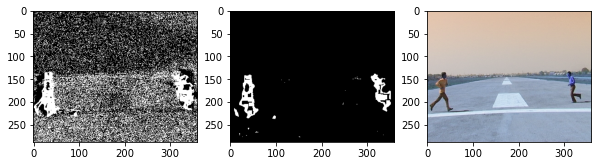

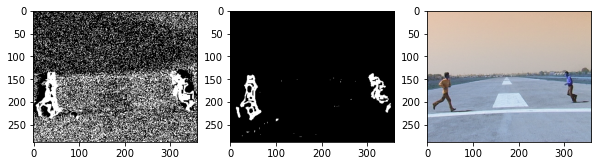

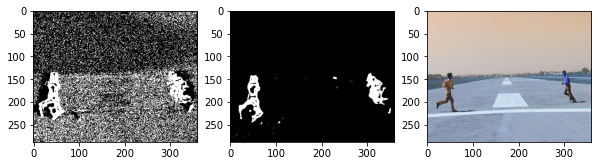

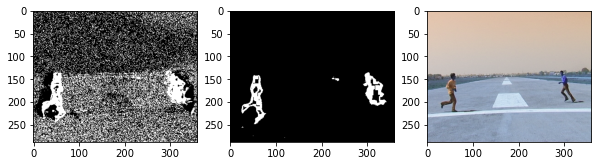



Using lambda as 0.74 and eta as 0.7


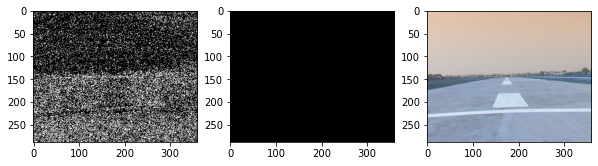

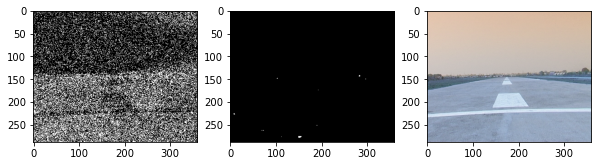

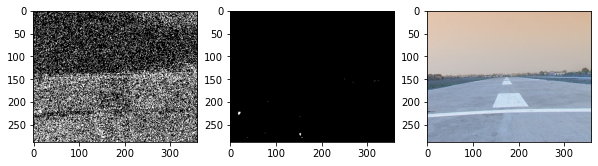

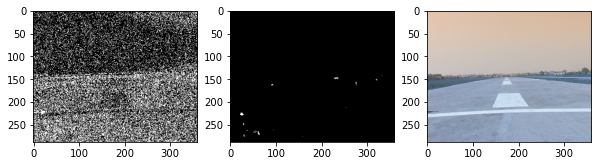

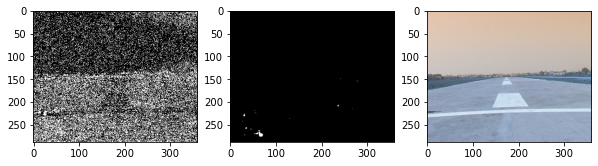

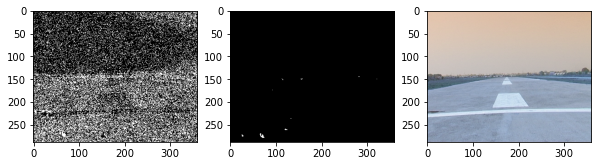

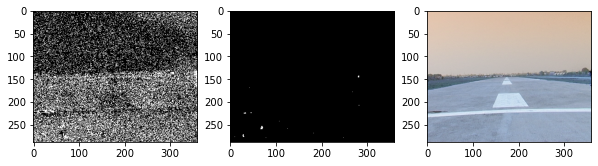

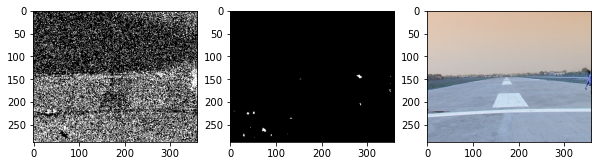

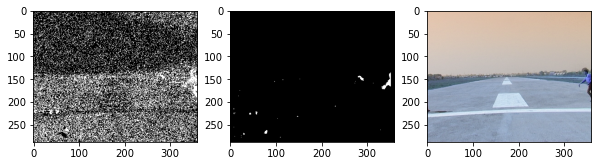

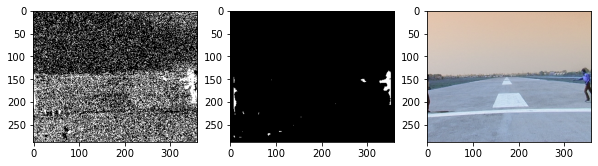

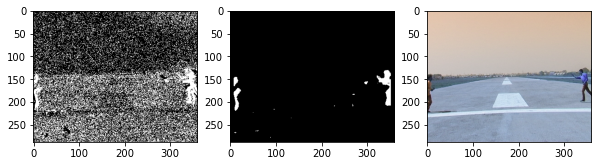

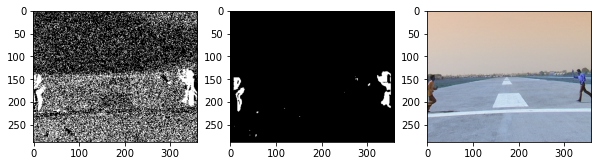

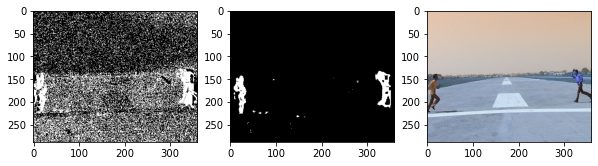

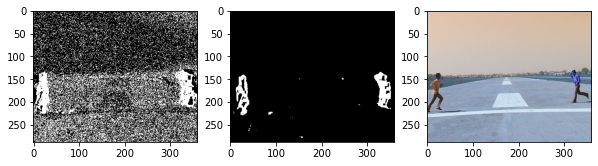

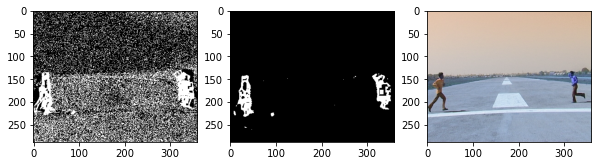

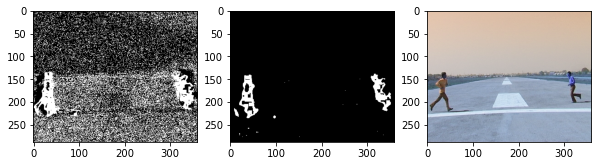

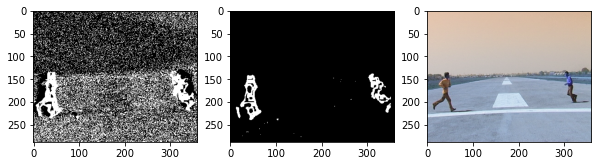

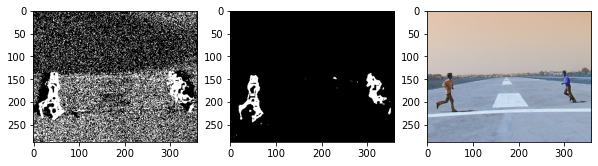

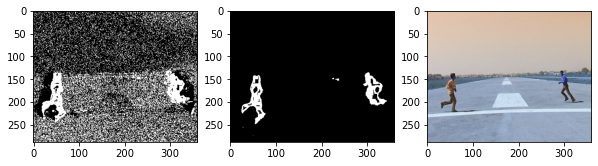



Using lambda as 0.76 and eta as 0.7


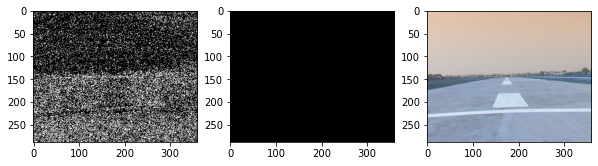

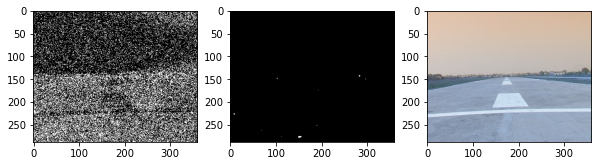

In [ ]:
p=[i for i in np.arange(0.70,0.90,0.02)] # we take the rage of lmda 
q=[j for j in np.arange(0.70,0.90,0.02)] # we take the range of eta
for eta in p:
    for lmda in q:
        print("Using lambda as {} and eta as {}".format(lmda,eta))
        mean,variance = Background_Subtraction("./Images",lmda,eta,8,8,0.8)# we pass the arguments
        print("\n")
    
        
                                       